P2> Find the top 3 Rooms in each city based on their Reviews


initial step: adding cleaned excel file using pandas for analysis

In [3]:
import pandas as pd
df = pd.read_excel("cleaned_data.xlsx")
df.head()

,Unnamed: 0,ID,City,Location,PType,PPN,Nights,Beds,Baths,Reviews,Recent
0,0,IND137,Mumbai,Unknown,Entire Home/Apartment,3200,2.000000,1,1,4.000000,2022-03-12
1,1,IND138,Bangalore,Indiranagar,Private Room,1800,1.959184,1,1,2.000000,2023-02-15
2,2,IND139,Delhi,Hauz Khas,Entire Home/Apartment,4200,3.000000,2,2,3.853659,2021-12-25
3,3,IND140,Chennai,Teynampet,Shared Room,1000,1.000000,2,1,1.000000,2022-05-05
4,4,IND141,Hyderabad,Jubilee Hills,Entire Home/Apartment,3800,3.000000,3,3,5.000000,2022-08-20


-- Removing unnecessary unnamed col automatically added by excel from dataframe

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

-- calculating top 3 city based on Reviews

In [4]:
df_pvt=df.pivot_table(
    index='ID',
    values='Reviews',
    aggfunc='sum'
)

-- Multiple rooms have same reviews in top 3, so in order to show all rooms having the same reviews i.e to tackle tie situation, I ranked the pivot table data on reviews

In [5]:
df_pvt["Rank"]=df_pvt['Reviews'].rank(method='dense', ascending=False)
top_3=df_pvt[df_pvt['Rank']<=3].sort_values(by='Rank',ascending=True)
top_3

,Reviews,Rank
ID,,
IND164,7.0,1.0
IND184,7.0,1.0
IND178,7.0,1.0
IND145,6.0,2.0
IND182,6.0,2.0
IND170,6.0,2.0
IND160,6.0,2.0
IND154,6.0,2.0
IND156,5.0,3.0


- Plotting the calculated fields to show reviews, and IDs of rooms with their rank

<Axes: title={'center': 'Top 3 Rooms by Review'}, xlabel='ID'>

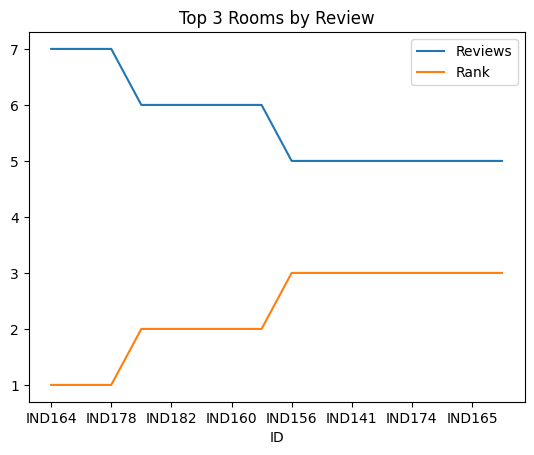

In [6]:
ax=top_3.plot(kind='line', legend=True, title='Top 3 Rooms by Review')
ax

-- INFERENCE AND OBSERVATIONS

- Top Ranked IDs : The IDs IND164, IND184, and IND178 have the highest reviews (7.0) and are ranked 1st.
-  Second Tier : IDs like IND145, IND182, and others have 6.0 reviews and are ranked 2nd.
- Third Tier : IDs with 5.0 reviews are ranked 3rd (e.g., IND156, IND157, etc.).
- Pattern : Higher reviews = Better rank.
- Many Ties : Multiple IDs have the same rank, meaning a few places have similar performance.
